In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics
import pandas_profiling

df = pd.read_csv('/Users/23behmen_t/Downloads/Columbia_CLI.csv', index_col=0)

# Data Cleaning

In [190]:
#looking through the data to sort any outliers or anything that could bias the algorithm
df['int_rate'].describe()

count    999.000000
mean      12.961331
std        3.881742
min        6.030000
25%        9.910000
50%       12.690000
75%       15.960000
max       23.910000
Name: int_rate, dtype: float64

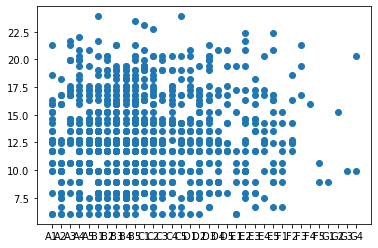

In [191]:
#looking through graphs to sort any outliers or anything that could bias the algorithm
x= df['sub_grade'].sort_values()
y=df['int_rate']
plt.scatter(x,y)

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

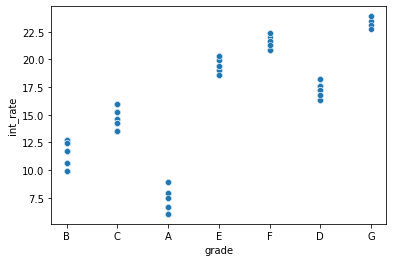

In [192]:
sns.scatterplot(x="grade", y="int_rate", data=df)

,Total,Percent
inq_last_12m,999,100.000000
total_bal_il,999,100.000000
mths_since_last_major_derog,999,100.000000
annual_inc_joint,999,100.000000
dti_joint,999,100.000000
verification_status_joint,999,100.000000
tot_coll_amt,999,100.000000
tot_cur_bal,999,100.000000
open_il_6m,999,100.000000
open_il_12m,999,100.000000


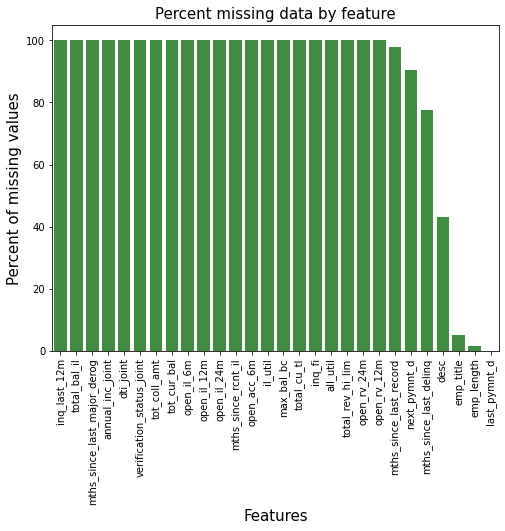

In [193]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(df)

Index(['inq_last_12m', 'total_bal_il', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'open_acc_6m', 'il_util',
       'max_bal_bc', 'total_cu_tl', 'inq_fi', 'all_util', 'total_rev_hi_lim',
       'open_rv_24m', 'open_rv_12m', 'mths_since_last_record'],
      dtype='object')


,Total,Percent
next_pymnt_d,905,90.590591
mths_since_last_delinq,774,77.477477
desc,432,43.243243
emp_title,51,5.105105
emp_length,17,1.701702
last_pymnt_d,1,0.100100


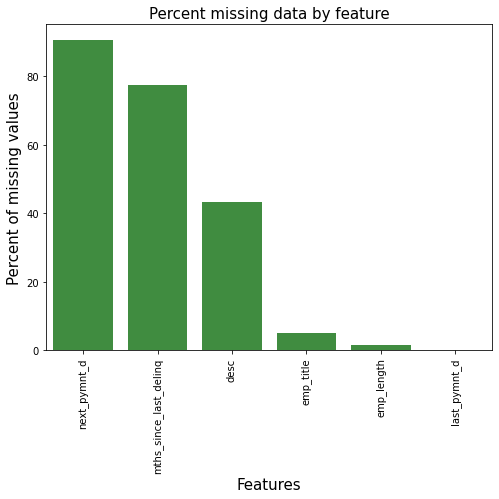

In [194]:
#Coding this to find and then delete all of the columns which were 100% NaN
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
ms=pd.concat([percent], axis=1, keys=['Percent'])
ms = ms.loc[ms['Percent'] > 95]
deletables = ms.index
print(deletables)
DF = df.drop(list(deletables), axis = 1)
missingdata(DF)
# dm = ms.loc[ms['Percent'] ==100].count
# dm
    

In [195]:
#Dropping the lists with nulls that are irrelevant, ex: next payment day is not gonna conclude the total int_rate
extra_drops = ['next_pymnt_d','desc','emp_title']
DF = DF.drop(list(extra_drops), axis = 1)
DF

,member_id,CLI,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,0.00,0.00,0.00,15-Jan,171.62,16-Jan,0,1,INDIVIDUAL,0
1077430,1314167,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,0.00,117.08,1.11,13-Apr,119.66,13-Sep,0,1,INDIVIDUAL,0
1077175,1313524,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,0.00,0.00,0.00,14-Jun,649.91,16-Jan,0,1,INDIVIDUAL,0
1076863,1277178,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,16.97,0.00,0.00,15-Jan,357.48,15-Jan,0,1,INDIVIDUAL,0
1075358,1311748,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,...,0.00,0.00,0.00,16-Jan,67.79,16-Jan,0,1,INDIVIDUAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057818,1289186,7000,36 months,8.90,222.28,A,A5,5 years,OWN,50000.0,...,0.00,0.00,0.00,14-Dec,229.64,14-Dec,0,1,INDIVIDUAL,0
1057629,1289394,2425,36 months,15.27,84.39,C,C4,3 years,OWN,80004.0,...,15.00,0.00,0.00,15-Jan,16.06,15-Jul,0,1,INDIVIDUAL,0
1057621,1289385,6950,36 months,9.91,223.97,B,B1,2 years,RENT,43000.0,...,0.00,0.00,0.00,12-Sep,1560.92,14-Apr,0,1,INDIVIDUAL,0


,Total,Percent
mths_since_last_delinq,774,77.477477
emp_length,17,1.701702
last_pymnt_d,1,0.100100


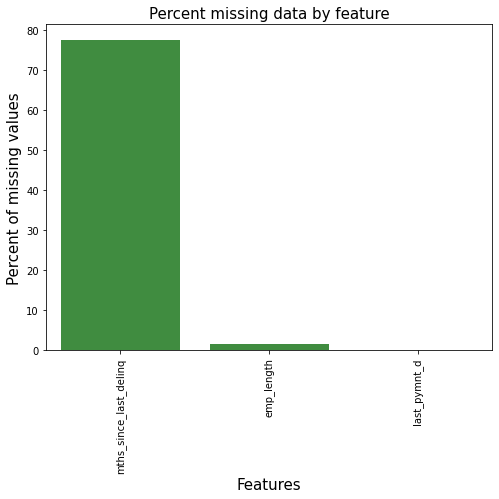

In [196]:
missingdata(DF)



In [197]:
DF['mths_since_last_delinq'].fillna(DF['mths_since_last_delinq'].mode()[0], inplace = True)
DF['emp_length'].fillna(DF['emp_length'].mode()[0], inplace = True)
DF['last_pymnt_d'].fillna(DF['last_pymnt_d'].mode()[0], inplace = True)

all nulls gone


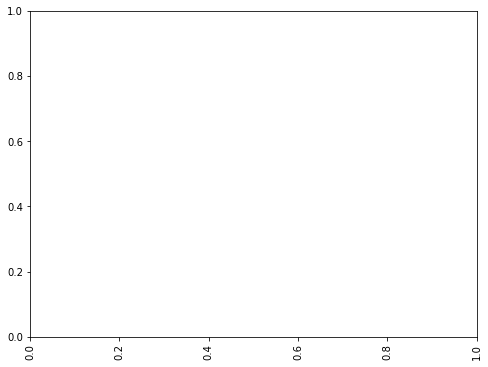

In [198]:
try:
    missingdata(DF)
except:
    print("all nulls gone")

In [199]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1077501 to 1057770
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   999 non-null    int64  
 1   CLI                         999 non-null    int64  
 2   term                        999 non-null    object 
 3   int_rate                    999 non-null    float64
 4   installment                 999 non-null    float64
 5   grade                       999 non-null    object 
 6   sub_grade                   999 non-null    object 
 7   emp_length                  999 non-null    object 
 8   home_ownership              999 non-null    object 
 9   annual_inc                  999 non-null    float64
 10  verification_status         999 non-null    object 
 11  loan_status                 999 non-null    object 
 12  pymnt_plan                  999 non-null    object 
 13  purpose                  

In [200]:
dtypes = DF.dtypes
dt=pd.concat([dtypes], axis=1, keys=['types'])
dt1 = dt.loc[dt['types'] == 'object']
dummies = dt1.index
traindf = pd.get_dummies(DF, columns = dummies)
traindf.shape
traindf

,member_id,CLI,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,last_credit_pull_d_15-Jan,last_credit_pull_d_15-Jul,last_credit_pull_d_15-Jun,last_credit_pull_d_15-Mar,last_credit_pull_d_15-May,last_credit_pull_d_15-Nov,last_credit_pull_d_15-Oct,last_credit_pull_d_15-Sep,last_credit_pull_d_16-Jan,application_type_INDIVIDUAL
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,10.65,162.87,24000.0,27.65,0,1,38.0,3,...,0,0,0,0,0,0,0,0,1,1
1077430,1314167,2500,15.27,59.83,30000.0,1.00,0,5,38.0,3,...,0,0,0,0,0,0,0,0,0,1
1077175,1313524,2400,15.96,84.33,12252.0,8.72,0,2,38.0,2,...,0,0,0,0,0,0,0,0,1,1
1076863,1277178,10000,13.49,339.31,49200.0,20.00,0,1,35.0,10,...,1,0,0,0,0,0,0,0,0,1
1075358,1311748,3000,12.69,67.79,80000.0,17.94,0,0,38.0,15,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057818,1289186,7000,8.90,222.28,50000.0,16.68,0,1,71.0,7,...,0,0,0,0,0,0,0,0,0,1
1057629,1289394,2425,15.27,84.39,80004.0,23.92,1,3,19.0,8,...,0,1,0,0,0,0,0,0,0,1
1057621,1289385,6950,9.91,223.97,43000.0,20.51,0,0,38.0,6,...,0,0,0,0,0,0,0,0,0,1
